# MNIST Deep Neural Network using Keras and Tensorflow

## Declare Model

In [80]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(784,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


## Get MNIST Dataset

Keras package has MNIST dataset. Datapoints are normalized for increased accuracy.

In [81]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test =x_test/255

In [82]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Visualization

The below code shows the visualization of a random training point

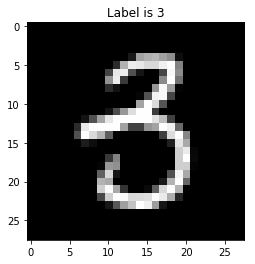

In [83]:
import matplotlib.pyplot as plt
example_index = 254
plt.title('Label is {label}'.format(label=str(y_train[example_index]) ))
plt.imshow(x_train[example_index], cmap='gray')
plt.show()


## Reshaping training data

<b>The below code snippet for reshaping the training data as the input dimensions in the sequential model is (784,)</b>

In [84]:
(train_num,rows,cols) = x_train.shape
x_train = x_train.reshape((train_num,rows*cols))
(test_num,rows,cols) = x_test.shape
x_test = x_test.reshape((test_num,rows*cols))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [85]:
from keras.utils import to_categorical
y_train_binary = to_categorical(y_train)
y_test_binary = to_categorical(y_test)

## Model training step

In [86]:
model.fit(epochs=10,x=x_train,y=y_train_binary,batch_size=600,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.9563 - acc: 0.7291
Epoch 2/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.3437 - acc: 0.9044
Epoch 3/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.2755 - acc: 0.9216
Epoch 4/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.2415 - acc: 0.9313
Epoch 5/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2199 - acc: 0.9362
Epoch 6/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.2028 - acc: 0.9412
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1891 - acc: 0.9454
Epoch 8/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1772 - acc: 0.9483
Epoch 9/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.1685 - acc: 0.9502
Epoch 10/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.1589 - acc: 0.9529

## Evaluating the model

In [87]:
test_loss, test_acc = model.evaluate(x_test, y_test_binary)
print('test accuracy:', test_acc)

10000/10000 [==============================] - 0s 44us/step
test accuracy: 0.947


The model shows a jump in prediction accuracy by 7% after the x_train values are normalized by using x_train = xtrain/255